# HOUSE COST PREDICTION #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

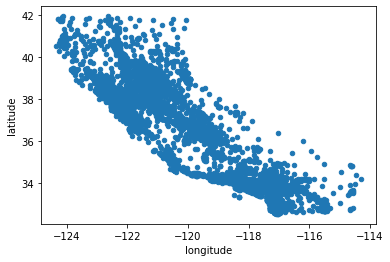

In [5]:
df.plot(kind="scatter", x="longitude", y="latitude")

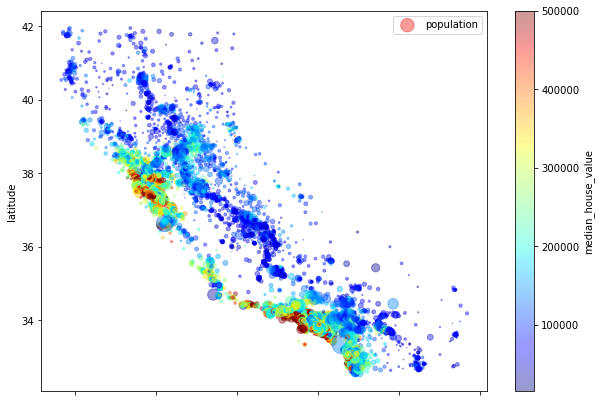

In [6]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=df["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [7]:
df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [8]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(20433, 10)

In [11]:
X=pd.DataFrame(columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity'],data=df)
y=pd.DataFrame(columns=['median_house_value'],data=df)

In [12]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [13]:
X = pd.get_dummies(data = X, columns = ['ocean_proximity'] , prefix = ['ocean_proximity'] , drop_first = True)

In [14]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train

array([[-1.14653761,  0.44712894, -0.68468262, ..., -0.01182583,
        -0.35564951, -0.38507396],
       [ 0.85461023, -0.83616485, -0.92275856, ..., -0.01182583,
        -0.35564951, -0.38507396],
       [ 0.58013858, -0.68629112,  0.42633841, ..., -0.01182583,
        -0.35564951, -0.38507396],
       ...,
       [-1.34615336,  1.18713047, -0.44660669, ..., -0.01182583,
         2.81175703, -0.38507396],
       [ 0.84961983, -0.88300039, -1.55762772, ..., -0.01182583,
        -0.35564951, -0.38507396],
       [ 2.03234312, -1.38414066, -0.36724804, ..., -0.01182583,
        -0.35564951, -0.38507396]])

In [18]:
model = tf.keras.models.Sequential([
                                    
         tf.keras.layers.Dense(X.shape[1], activation='relu', input_dim = X.shape[1]),
         tf.keras.layers.Dense(512,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(512,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(256,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(128,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(64,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(32,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(1,kernel_initializer='normal', activation='relu'),
])

In [19]:
X.shape[1]

12

In [20]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 512)               6656      
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                

In [21]:
from sklearn.metrics import mean_squared_error
model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
mse =mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

Epoch 1/10


1431/1431 [==============================] - 12s 6ms/step - loss: 8852931584.0000 - mse: 8852931584.0000 - mae: 64854.3281 - val_loss: 5889897472.0000 - val_mse: 5889897472.0000 - val_mae: 59465.5859
Epoch 2/10
1431/1431 [==============================] - 9s 6ms/step - loss: 4735242752.0000 - mse: 4735242752.0000 - mae: 49321.2930 - val_loss: 4330321408.0000 - val_mse: 4330321408.0000 - val_mae: 47258.0117
Epoch 3/10
1431/1431 [==============================] - 9s 6ms/step - loss: 4328314880.0000 - mse: 4328314880.0000 - mae: 46979.9961 - val_loss: 4160418816.0000 - val_mse: 4160418816.0000 - val_mae: 45433.5859
Epoch 4/10
1431/1431 [==============================] - 9s 6ms/step - loss: 4036998656.0000 - mse: 4036998656.0000 - mae: 45186.3398 - val_loss: 3911945216.0000 - val_mse: 3911945472.0000 - val_mae: 43008.4180
Epoch 5/10
1431/1431 [==============================] - 9s 6ms/step - loss: 3868439040.0000 - mse: 3868439040.0000 - mae: 43874.8750 - val_loss: 3693405696.0

In [22]:
history = model.fit(X_train, y_train.to_numpy(), batch_size = 10, epochs = 10, verbose = 1)

Epoch 1/10
1431/1431 [==============================] - 9s 6ms/step - loss: 3455928832.0000 - mse: 3455928832.0000 - mae: 40781.1953
Epoch 2/10
1431/1431 [==============================] - 8s 6ms/step - loss: 3388921600.0000 - mse: 3388921600.0000 - mae: 40360.3477
Epoch 3/10
1431/1431 [==============================] - 8s 6ms/step - loss: 3367566848.0000 - mse: 3367566848.0000 - mae: 40201.4023
Epoch 4/10
1431/1431 [==============================] - 8s 6ms/step - loss: 3331088128.0000 - mse: 3331088128.0000 - mae: 39832.6406
Epoch 5/10
1431/1431 [==============================] - 8s 6ms/step - loss: 3270897664.0000 - mse: 3270897664.0000 - mae: 39482.8945
Epoch 6/10
1431/1431 [==============================] - 8s 6ms/step - loss: 3220805888.0000 - mse: 3220805888.0000 - mae: 39184.7500
Epoch 7/10
1431/1431 [==============================] - 8s 6ms/step - loss: 3213900544.0000 - mse: 3213900544.0000 - mae: 39163.2695
Epoch 8/10
1431/1431 [==============================] - 8s 6ms/step -

In [23]:
model.predict(X_test)

192/192 [==============================] - 1s 3ms/step


array([[117100.65],
       [173783.22],
       [114020.98],
       ...,
       [ 96096.6 ],
       [ 79820.37],
       [202105.  ]], dtype=float32)

In [24]:
model.evaluate(X_test)

192/192 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - mse: 0.0000e+00 - mae: 0.0000e+00


[0.0, 0.0, 0.0]

In [25]:
model.evaluate(X_test, y_test)

192/192 [==============================] - 1s 3ms/step - loss: 3242326528.0000 - mse: 3242326528.0000 - mae: 38177.1367


[3242326528.0, 3242326528.0, 38177.13671875]